In [ ]:
%matplotlib inline


# CENSURE feature detector


The CENSURE feature detector is a scale-invariant center-surround detector
(CENSURE) that claims to outperform other detectors and is capable of real-time
implementation.



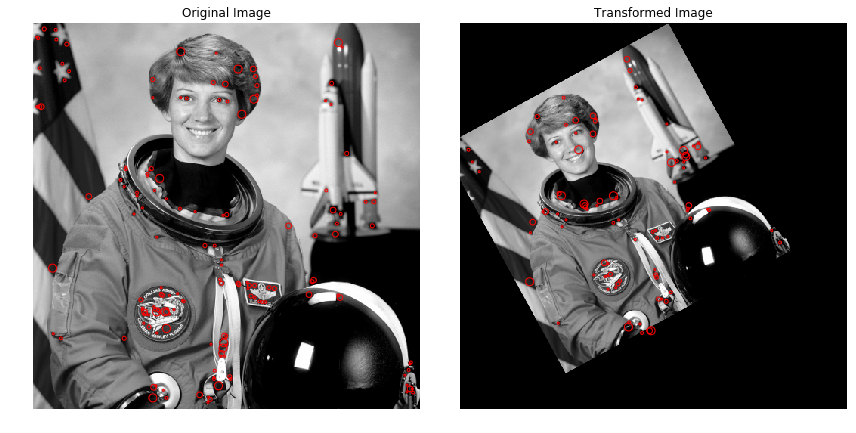

In [1]:
from skimage import data
from skimage import transform as tf
from skimage.feature import CENSURE
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


img_orig = rgb2gray(data.astronaut())
tform = tf.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                           translation=(150, -200))
img_warp = tf.warp(img_orig, tform)

detector = CENSURE()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_orig)

ax[0].imshow(img_orig, cmap=plt.cm.gray)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_warp)

ax[1].imshow(img_warp, cmap=plt.cm.gray)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show()

In [10]:
import cv2
import numpy as np
img = cv2.imread('Micrographs/000739.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img,flags=4)
cv2.imwrite('sift_keypoints.jpg',img)

True

In [11]:
kp, des = sift.detectAndCompute(gray,None)

In [32]:
print(kp[0].pt[:])
print(des[1])
dir(kp[1])

(155.8693084716797, 2.389070987701416)
[   0.   30.  123.   31.    0.    0.    0.    0.    0.    2.   29.   61.
   13.    4.    0.    0.    0.    0.    0.    2.    9.    5.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   18.   96.  123.   23.
    8.    9.    1.    1.  102.   66.   61.   39.   25.   59.   20.   17.
    5.    0.    0.    6.   93.  123.   12.    4.   14.    0.    0.    3.
   27.   12.    0.    7.   31.   18.    8.    3.    9.   63.  104.   44.
  123.   31.    2.    5.   20.   18.   28.  102.   17.    4.    0.   21.
  123.  123.   60.    6.   96.    8.    0.    4.   48.   74.   72.   32.
   12.    3.    2.   11.   32.   25.   72.   30.   40.   38.    0.    1.
    3.   17.   46.   50.   36.   63.    2.    2.   10.   75.   94.    9.
   21.   10.    3.    9.   42.  123.   84.    7.]


['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'angle',
 'class_id',
 'octave',
 'pt',
 'response',
 'size']

In [6]:
from skimage import data
from skimage import transform as tf
from skimage.feature import ORB
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


img_orig = rgb2gray(data.astronaut())


detector = ORB()



detector.detect_and_extract(img_orig)


# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# ax[0].imshow(img_orig, cmap=plt.cm.gray)
# ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
#               2 ** detector.scales, facecolors='none', edgecolors='r')
# ax[0].set_title("Original Image")

# detector.detect(img_warp)

# for a in ax:
#     a.axis('off')
    
# plt.tight_layout()
# plt.show()

In [16]:
import numpy as np
print(np.shape(detector.descriptors))
print(detector.descriptors[1,:])
print(detector.keypoints[1,:])

(500, 256)
[False False  True False  True  True  True  True False  True  True  True
  True False  True  True False  True  True False  True False False  True
 False  True  True  True  True False False False False  True False  True
  True  True  True  True False False  True False False  True False  True
  True  True  True False  True False False False  True  True  True False
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True False  True False False  True False  True False False
 False  True  True  True False False  True False  True  True False False
 False  True  True  True False  True  True  True False  True False False
  True  True  True  True False False False False False  True  True False
  True  True False  True  True False  True False  True  True  True  True
 False  True  True  True  True  True False False  True  True  True  True
 False  True  True  True False  True  True  True False  True False False
  True False False  True False  True Fal